# Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg
- MSRP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

100% [..........................................................................] 1475504 / 1475504

'data.csv'

In [3]:
# !wget $data -0 data-week-3.csv

In [3]:
df0 = pd.read_csv("data.csv")
df0.head().T

0  \
Make                                                 BMW   
Model                                         1 Series M   
Year                                                2011   
Engine Fuel Type             premium unleaded (required)   
Engine HP                                          335.0   
Engine Cylinders                                     6.0   
Transmission Type                                 MANUAL   
Driven_Wheels                           rear wheel drive   
Number of Doors                                      2.0   
Market Category    Factory Tuner,Luxury,High-Performance   
Vehicle Size                                     Compact   
Vehicle Style                                      Coupe   
highway MPG                                           26   
city mpg                                              19   
Popularity                                          3916   
MSRP                                               46135   

                                             1                            2  \
Make                                       BMW                          BMW   
Model                                 1 Series                     1 Series   
Year                                      2011                         2011   
Engine Fuel Type   premium unleaded (required)  premium unleaded (required)   
Engine HP                                300.0                        300.0   
Engine Cylinders                           6.0                          6.0   
Transmission Type                       MANUAL                       MANUAL   
Driven_Wheels                 rear wheel drive             rear wheel drive   
Number of Doors                            2.0                          2.0   
Market Category             Luxury,Performance      Luxury,High-Performance   
Vehicle Size                           Compact                      Compact   
Vehicle Style                      Convertible                        Coupe   
highway MPG                                 28                           28   
city mpg                                    19                           20   
Popularity                                3916                         3916   
MSRP                                     40650                        36350   

                                             3                            4  
Make                                       BMW                          BMW  
Model                                 1 Series                     1 Series  
Year                                      2011                         2011  
Engine Fuel Type   premium unleaded (required)  premium unleaded (required)  
Engine HP                                230.0                        230.0  
Engine Cylinders                           6.0                          6.0  
Transmission Type                       MANUAL                       MANUAL  
Driven_Wheels                 rear wheel drive             rear wheel drive  
Number of Doors                            2.0                          2.0  
Market Category             Luxury,Performance                       Luxury  
Vehicle Size                           Compact                      Compact  
Vehicle Style                            Coupe                  Convertible  
highway MPG                                 28                           28  
city mpg                                    18                           18  
Popularity                                3916                         3916  
MSRP                                     29450                        34500

In [4]:
df0.shape

(11914, 16)

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`

In [5]:
df = df0[["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]].copy()
df.shape

(11914, 10)

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [8]:
df.describe()

Year    Engine HP  Engine Cylinders   highway MPG  \
count  11914.000000  11845.00000      11884.000000  11914.000000   
mean    2010.384338    249.38607          5.628829     26.637485   
std        7.579740    109.19187          1.780559      8.863001   
min     1990.000000     55.00000          0.000000     12.000000   
25%     2007.000000    170.00000          4.000000     22.000000   
50%     2015.000000    227.00000          6.000000     26.000000   
75%     2016.000000    300.00000          6.000000     30.000000   
max     2017.000000   1001.00000         16.000000    354.000000   

           city mpg          MSRP  
count  11914.000000  1.191400e+04  
mean      19.733255  4.059474e+04  
std        8.987798  6.010910e+04  
min        7.000000  2.000000e+03  
25%       16.000000  2.100000e+04  
50%       18.000000  2.999500e+04  
75%       22.000000  4.223125e+04  
max      137.000000  2.065902e+06

In [9]:
df.describe(include = object)

Make           Model Transmission Type Vehicle Style
count       11914           11914             11914         11914
unique         48             915                 5            16
top     Chevrolet  Silverado 1500         AUTOMATIC         Sedan
freq         1123             156              8266          3048

In [10]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [11]:
df.duplicated().sum()

828

### Data preparation

- Keep only the columns above
- Lowercase the column names and replace spaces with underscores
- Fill the missing values with 0
- Rename `MSRP` variable to `price`.
- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
- Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

**Lowercase the column names and replace spaces with underscores**

In [12]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

**Fill the missing values with 0**

In [14]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [15]:
# df.fillna(0, inplace=True)

df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

**Rename `MSRP` variable to `price`**

In [16]:
df.rename(columns={"msrp": "price"}, inplace=True)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [17]:
numerical= df.drop(['price'], axis=1).select_dtypes('number').columns.to_list()

categorical = df.select_dtypes('object').columns.to_list()

In [18]:
print(numerical)
print()
print(categorical)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

['make', 'model', 'transmission_type', 'vehicle_style']


**Make the price binary**

In [19]:
# df.churn = (df.churn =="yes").astype(int)

df["above_average"] = df.price.apply(lambda x : 1 if x >= df.price.mean() else 0)
df.head()

make       model  year  engine_hp  engine_cylinders transmission_type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

  vehicle_style  highway_mpg  city_mpg  price  above_average  
0         Coupe           26        19  46135              1  
1   Convertible           28        19  40650              1  
2         Coupe           28        20  36350              0  
3         Coupe           28        18  29450              0  
4   Convertible           28        18  34500              0

**Split the data**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(df.drop("price", axis=1), test_size=0.2, random_state=1)

In [22]:
len(df_full_train), len(df_test)

(9531, 2383)

In [25]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
df_train.head()

make              model  year  engine_hp  engine_cylinders  \
0      Toyota  Highlander Hybrid  2016      280.0               6.0   
1   Chevrolet     Impala Limited  2014      300.0               6.0   
2       Buick              Regal  2016      259.0               4.0   
3  Volkswagen                 CC  2015      280.0               6.0   
4       Dodge      Grand Caravan  2016      283.0               6.0   

  transmission_type      vehicle_style  highway_mpg  city_mpg  above_average  
0         AUTOMATIC            4dr SUV           28        27              1  
1         AUTOMATIC              Sedan           30        18              0  
2         AUTOMATIC              Sedan           27        19              0  
3  AUTOMATED_MANUAL              Sedan           25        17              1  
4         AUTOMATIC  Passenger Minivan           25        17              0

In [29]:
df_val.head()

make     model  year  engine_hp  engine_cylinders transmission_type  \
0   Nissan      370Z  2015      350.0               6.0         AUTOMATIC   
1  Pontiac  Firebird  2000      305.0               8.0           UNKNOWN   
2    Acura       RDX  2015      273.0               6.0         AUTOMATIC   
3      Kia    Sedona  2016      276.0               6.0         AUTOMATIC   
4   Nissan     Truck  1996      134.0               4.0            MANUAL   

        vehicle_style  highway_mpg  city_mpg  above_average  
0               Coupe           26        19              1  
1       2dr Hatchback           23        15              0  
2             4dr SUV           27        19              0  
3   Passenger Minivan           24        18              0  
4  Regular Cab Pickup           24        19              0

In [30]:
df_test.head()

make       model  year  engine_hp  engine_cylinders  \
0         Lotus   Evora 400  2017      400.0               6.0   
1  Aston Martin  V8 Vantage  2014      420.0               8.0   
2       Hyundai     Genesis  2015      311.0               6.0   
3        Suzuki     Samurai  1993       66.0               4.0   
4    Mitsubishi   Outlander  2015      166.0               4.0   

  transmission_type    vehicle_style  highway_mpg  city_mpg  above_average  
0            MANUAL            Coupe           39        21              1  
1  AUTOMATED_MANUAL      Convertible           21        14              1  
2         AUTOMATIC            Sedan           29        18              0  
3            MANUAL  Convertible SUV           26        24              0  
4         AUTOMATIC          4dr SUV           29        24              0

In [31]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [32]:
len(y_train), len(y_val), len(y_test)

(7148, 2383, 2383)

In [44]:
print(y_train)
print(y_val)
print(y_test)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [36]:
del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

## 4.1 Evaluation metrics: session overview

The fourth week of Machine Learning Zoomcamp is about different metrics to evaluate a binary classifier. These measures include accuracy, confusion table, precision, recall, ROC curves(TPR, FRP, random model, and ideal model), AUROC, and cross-validation.

For this project, we used a [Kaggle dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) about churn prediction.

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg

In [38]:
# from sklearn.model_selection import train_test_split

# # Split the data into train, validation, and test sets (60%/20%/20%)

# train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
# val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# print("Train set shape:", train_data.shape, round((train_data.shape[0]/df.shape[0])*100), "%")
# print("Validation set shape:", val_data.shape, round((val_data.shape[0]/df.shape[0])*100), "%")
# print("Test set shape:", test_data.shape, round((test_data.shape[0]/df.shape[0])*100), "%")

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [39]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

make      model  year  engine_hp  engine_cylinders  \
0       Cadillac        CT6  2016      265.0               4.0   
1  Mercedes-Benz  GLS-Class  2017      449.0               8.0   
2            Kia      Forte  2016      173.0               4.0   
3          Dodge    RAM 250  1993      180.0               6.0   
4        Hyundai    Tiburon  2008      172.0               6.0   

  transmission_type       vehicle_style  highway_mpg  city_mpg  above_average  
0         AUTOMATIC               Sedan           31        22              1  
1         AUTOMATIC             4dr SUV           18        14              1  
2         AUTOMATIC               Coupe           34        25              0  
3            MANUAL  Regular Cab Pickup           16        11              0  
4         AUTOMATIC       2dr Hatchback           24        17              0

In [40]:
df_full_train.above_average.value_counts()

0    6893
1    2638
Name: above_average, dtype: int64

In [41]:
df_full_train.above_average.value_counts(normalize=True)

0    0.723219
1    0.276781
Name: above_average, dtype: float64

In [42]:
df_full_train.above_average.mean()

0.2767810303221068

In [43]:
df_full_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [44]:
# numerical = df_full_train.select_dtypes("number")
# numerical.columns

In [45]:
df_full_train[numerical].corr()

year  engine_hp  engine_cylinders  highway_mpg  city_mpg
year              1.000000   0.339352         -0.038241     0.258570  0.203368
engine_hp         0.339352   1.000000          0.777642    -0.412442 -0.435490
engine_cylinders -0.038241   0.777642          1.000000    -0.606827 -0.595753
highway_mpg       0.258570  -0.412442         -0.606827     1.000000  0.869399
city_mpg          0.203368  -0.435490         -0.595753     0.869399  1.000000

In [46]:
# categorical = df_full_train.select_dtypes("object")
# categorical.columns

In [47]:
df_full_train[categorical].nunique()

make                  48
model                902
transmission_type      5
vehicle_style         16
dtype: int64

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
# mutual_info_score(df_full_train.COLUMN, df_full_train.above_average)

In [50]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.above_average)

In [51]:
df_mi = df_full_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi)

MI
model              0.460994
make               0.238724
vehicle_style      0.083390
transmission_type  0.020884

## 3.7 Feature importance: Correlation**

How about numerical columns?
    
**Correlation coefficient** measures the degree of dependency between two variables. This value is **negative** if one variable grows while the other decreases, and it is **positive** if both variables increase. Depending on its size, the dependency between both variables could be **low, moderate, or strong**. It allows measuring the importance of numerical variables.

**If r is correlation coefficient, then the correlation between two variables is:**

- LOW when r is between [0, -0.2) or [0, 0.2)
- MEDIUM when r is between [-0.2, -0.5) or [2, 0.5)
- STRONG when r is between [-0.5, -1.0] or [0.5, 1.0]

**Positive Correlation vs. Negative Correlation**

- When r is positive, an increase in x will increase y.
- When r is negative, an increase in x will decrease y.
- When r is 0, a change in x does not affect y.

**Functions and methods:**

df[x].corrwith(y) - returns the correlation between x and y series. This is a function from pandas.

The entire code of this project is available in this [jupyter notebook](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/03-churn.ipynb).    

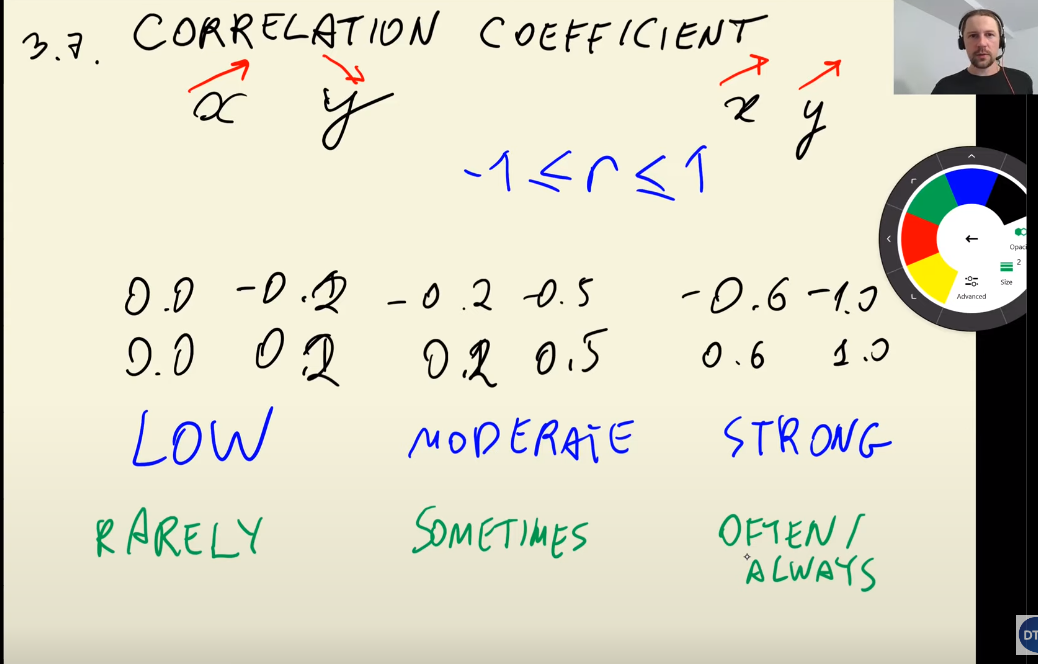

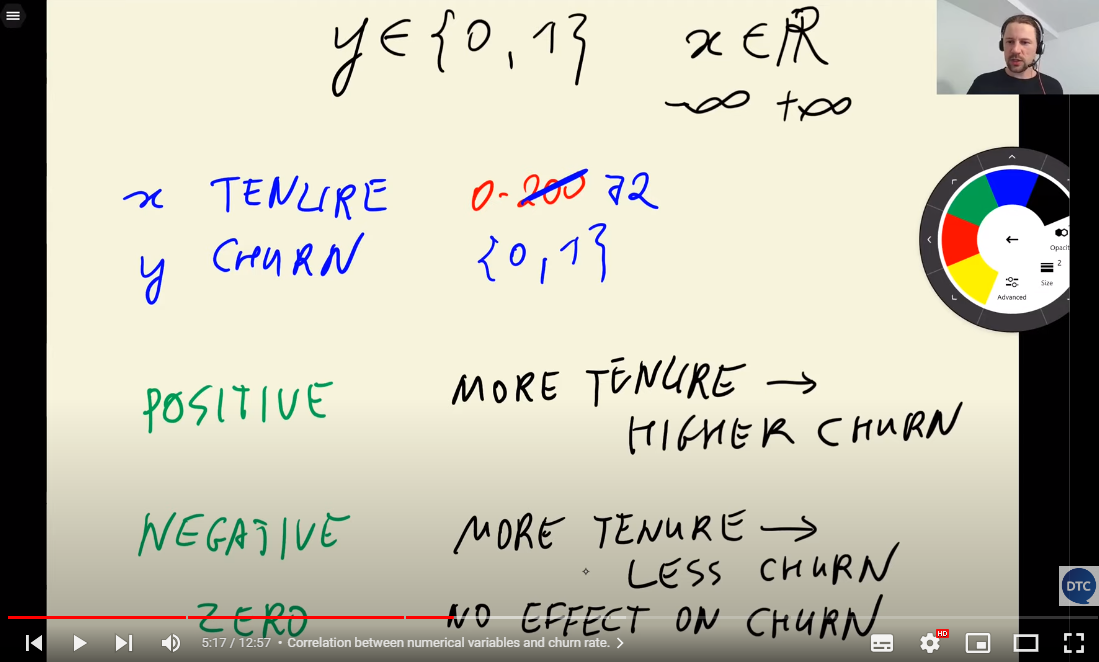

In [52]:
df_full_train[numerical].corrwith(df_full_train.above_average).sort_values(ascending=False).to_frame('correlation')

correlation
engine_hp            0.660670
engine_cylinders     0.453162
year                 0.318753
highway_mpg         -0.134484
city_mpg            -0.157912

In [53]:
df_full_train.groupby(by='above_average')[numerical].mean()

year   engine_hp  engine_cylinders  highway_mpg  \
above_average                                                           
0              2008.926882  202.652981          5.107355    27.363412   
1              2014.300986  365.903336          6.927976    24.734268   

                city_mpg  
above_average             
0              20.522124  
1              17.524261

## 3.8 One-hot encoding

- Use Scikit-Learn to encode categorical features.

One-Hot Encoding allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.

**Classes, functions, and methods:**

- df[x].to_dict(oriented='records') - convert x series to dictionaries, oriented by rows.
- DictVectorizer().fit_transform(x) - Scikit-Learn class for converting x dictionaries into a sparse matrix, and in this way doing the one-hot encoding. It does not affect the numerical variables.
- DictVectorizer().get_feature_names() - returns the names of the columns in the sparse matrix.

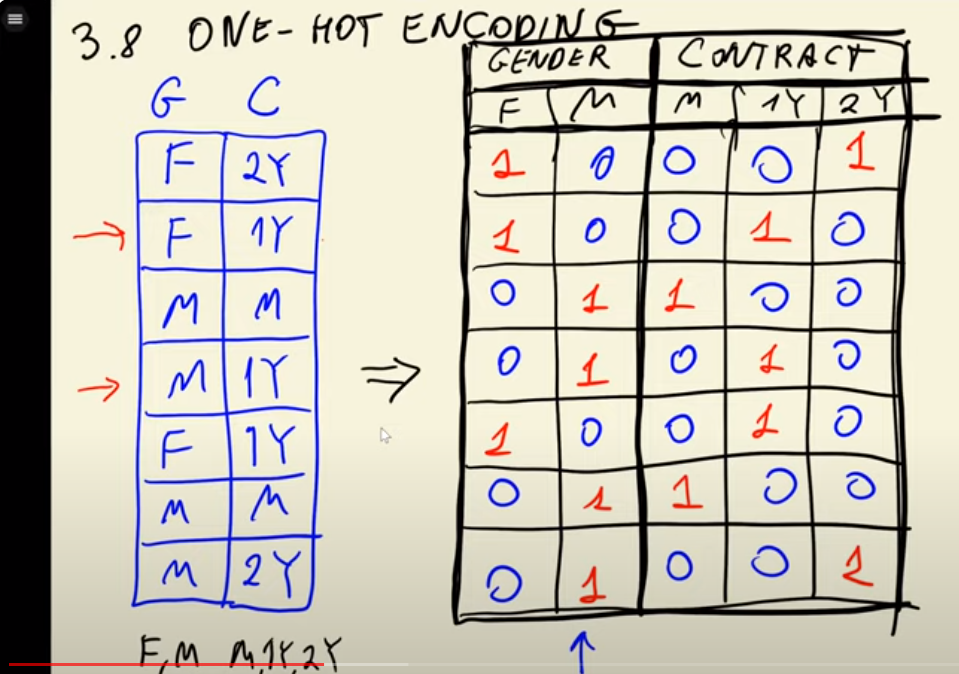

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
# categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
# numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [56]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [57]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [58]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [59]:
X_train = dv.transform(train_dict)

In [60]:
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [61]:
X_train.shape

(7148, 943)

In [62]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [63]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [64]:
X_val = dv.transform(val_dict)

In [65]:
X_val

array([[2.300e+01, 4.000e+00, 2.100e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.700e+01, 6.000e+00, 3.540e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [2.200e+01, 4.000e+00, 1.400e+02, ..., 1.000e+00, 0.000e+00,
        2.005e+03],
       ...,
       [1.200e+01, 6.000e+00, 1.900e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.400e+01, 8.000e+00, 4.300e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.800e+01, 6.000e+00, 3.210e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

## 3.9 Logistic Regression

- Binary Classification
- Linear vs Logistic Regression

In general, supervised models follow can be represented with this formula:

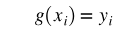

Depending on what is the type of target variable, the supervised task can be regression or classification (binary or multiclass). Binary classification tasks can have negative (0) or positive (1) target values. The output of these models is the probability of xi belonging to the positive class.

Logistic regression is similar to linear regression because both models take into account the bias term and weighted sum of features. The difference between these models is that the output of linear regression is a real number, while logistic regression outputs a value between zero and one, applying the sigmoid function to the linear regression formula.

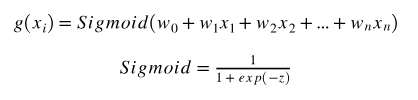

In this way, the sigmoid function allows transforming a score into a probability.

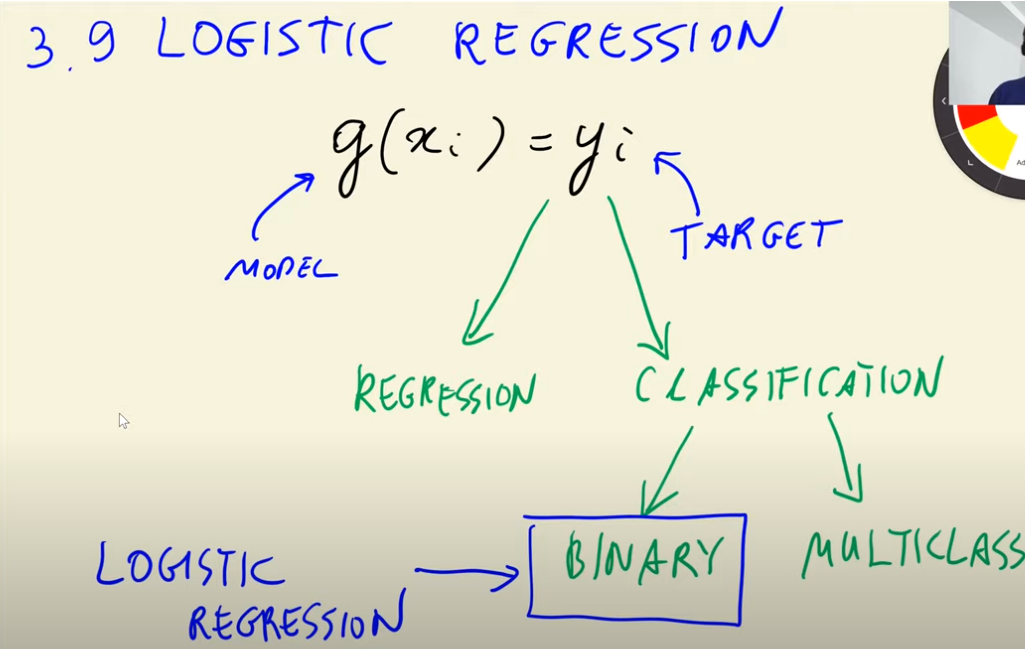

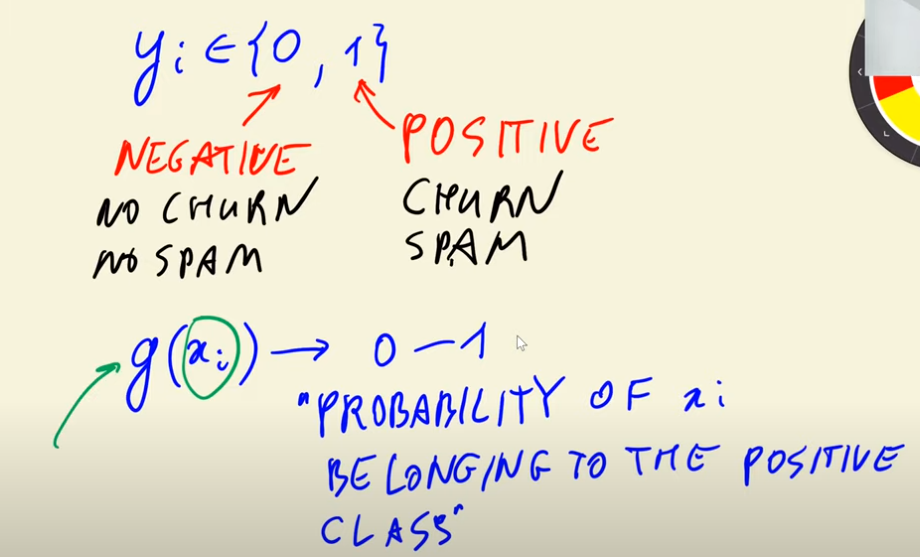

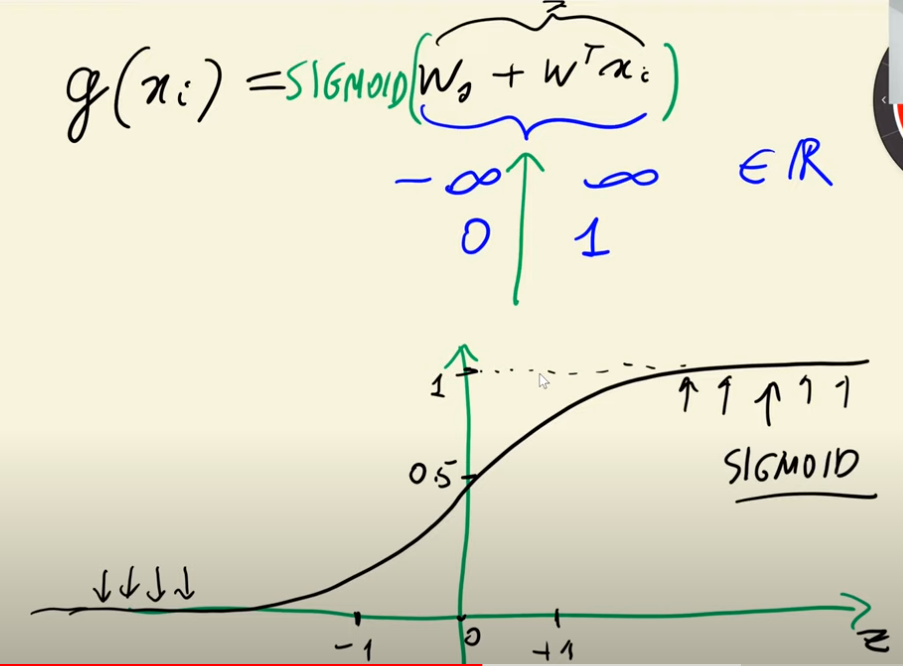

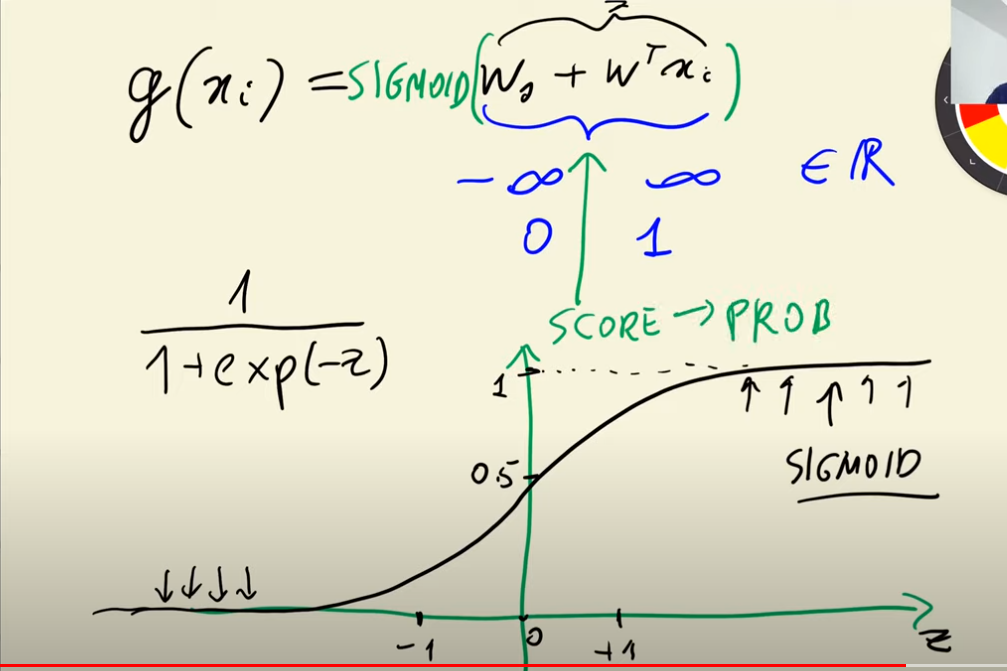

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
z = np.linspace(-7,7,51)

In [68]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

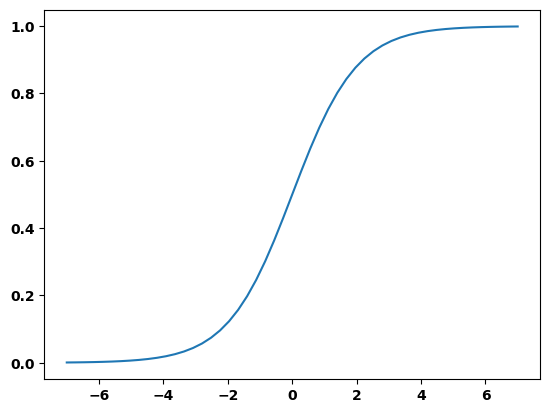

In [69]:
plt.plot(z, sigmoid(z))
plt.show()

In [70]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [71]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

- Training model with Scikit-Learn
- Applying it to the validation dataset
- Calculate its accuracy.

**Classes, functions, and methods:**

- LogisticRegression().fit_transform(x) - Scikit-Learn class for calculating the logistic regression model.
- LogisticRegression().coef_[0] - returns the coeffcients or weights of the LR model
- LogisticRegression().intercept_[0] - returns the bias or intercept of the LR model
- LogisticRegression().predict[x] - make predictions on the x dataset
- LogisticRegression().predict_proba[x] - make predictions on the x dataset, and returns two columns with their probabilities for the two categories - soft predictions

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [74]:
model.intercept_[0]

-0.5493086897262572

In [75]:
model.coef_[0].round(3)

array([ 8.300e-02, -1.330e-01,  3.900e-02,  0.000e+00,  1.601e+00,
        2.188e+00,  7.620e-01,  3.249e+00,  2.858e+00,  2.130e-01,
        0.000e+00, -4.610e-01,  2.597e+00, -1.751e+00, -1.413e+00,
       -4.048e+00, -6.620e-01,  5.090e-01, -2.132e+00, -1.369e+00,
        8.890e-01, -3.550e-01, -1.347e+00, -2.693e+00,  3.290e-01,
       -1.526e+00,  1.500e-02,  2.173e+00,  1.507e+00,  1.224e+00,
        4.405e+00,  1.343e+00,  6.000e-03, -1.762e+00,  1.000e-03,
        9.090e-01, -2.414e+00, -1.314e+00, -1.753e+00, -6.450e-01,
       -3.691e+00,  1.956e+00,  1.274e+00,  7.200e-01, -3.000e-01,
        4.610e-01, -3.110e+00, -2.217e+00,  3.706e+00, -4.010e-01,
       -1.123e+00,  1.044e+00, -1.830e+00, -7.290e-01, -6.800e-02,
       -1.500e-02, -2.000e-03, -1.873e+00, -1.233e+00, -3.000e-03,
       -7.000e-03, -4.000e-03, -2.080e-01,  1.960e-01,  2.363e+00,
        7.270e-01, -6.570e-01, -6.900e-02, -2.310e-01, -2.810e-01,
       -0.000e+00, -2.300e-02, -1.136e+00,  2.050e-01,  6.000e

In [76]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [77]:
model.predict_proba(X_val) # Soft Predictions (Probabilities), 
                           # left side is probability of being 0
                           # right side is probability of being 1

array([[9.99692966e-01, 3.07033780e-04],
       [2.27974745e-03, 9.97720253e-01],
       [9.99930206e-01, 6.97938861e-05],
       ...,
       [9.99898957e-01, 1.01043039e-04],
       [8.98629570e-03, 9.91013704e-01],
       [9.08719100e-03, 9.90912809e-01]])

In [78]:
pd.options.display.float_format = '{:.4f}'.format

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([3.07033780e-04, 9.97720253e-01, 6.97938861e-05, ...,
       1.01043039e-04, 9.91013704e-01, 9.90912809e-01])

In [79]:
y_pred > 0.5

array([False,  True, False, ..., False,  True,  True])

In [80]:
above_average = y_pred > 0.5 # --> threshold
above_average

array([False,  True, False, ..., False,  True,  True])

In [81]:
above_average.astype(int)

array([0, 1, 0, ..., 0, 1, 1])

In [82]:
(y_val == above_average).mean()   # How accurate our predictions

0.946286193873269

In [83]:
model.predict(X_val) # Hard Predictions (Exact numbers 0 or 1)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [84]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = above_average.astype(int)
df_pred["actual"] = y_val
df_pred

probability  prediction  actual
0          0.0003           0       0
1          0.9977           1       1
2          0.0001           0       0
3          0.1932           0       0
4          0.0011           0       0
...           ...         ...     ...
2378       0.0016           0       0
2379       0.0013           0       0
2380       0.0001           0       0
2381       0.9910           1       1
2382       0.9909           1       1

[2383 rows x 3 columns]

In [85]:
df_pred["correct"] = df_pred.prediction == df_pred.actual
df_pred

probability  prediction  actual  correct
0          0.0003           0       0     True
1          0.9977           1       1     True
2          0.0001           0       0     True
3          0.1932           0       0     True
4          0.0011           0       0     True
...           ...         ...     ...      ...
2378       0.0016           0       0     True
2379       0.0013           0       0     True
2380       0.0001           0       0     True
2381       0.9910           1       1     True
2382       0.9909           1       1     True

[2383 rows x 4 columns]

In [86]:
df_pred["correct"].astype(int).mean()

0.946286193873269

In [87]:
from sklearn.metrics import accuracy_score

def eval_metric(y_val, y_pred):
    accuracy = accuracy_score(y_val, y_pred.astype(int))
    print("Accuracy on the validation dataset:", round(accuracy, 3))
    return accuracy

In [88]:
accuracy = eval_metric(y_val, above_average.astype(int))
accuracy

Accuracy on the validation dataset: 0.946


0.946286193873269

## 3.11 Model interpretation

- Look at the coefficients
- Train a model with fewer features.

In the formula of the logistic regression model, only one of the one-hot encoded categories is multiplied by 1, and the other by 0. In this way, we only consider the appropriate category for each categorical feature.

**Classes, functions, and methods:**

- zip(x,y) - returns a new list with elements from x joined with their corresponding elements on y

In [89]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [90]:
model.coef_[0].round(3)

array([ 8.300e-02, -1.330e-01,  3.900e-02,  0.000e+00,  1.601e+00,
        2.188e+00,  7.620e-01,  3.249e+00,  2.858e+00,  2.130e-01,
        0.000e+00, -4.610e-01,  2.597e+00, -1.751e+00, -1.413e+00,
       -4.048e+00, -6.620e-01,  5.090e-01, -2.132e+00, -1.369e+00,
        8.890e-01, -3.550e-01, -1.347e+00, -2.693e+00,  3.290e-01,
       -1.526e+00,  1.500e-02,  2.173e+00,  1.507e+00,  1.224e+00,
        4.405e+00,  1.343e+00,  6.000e-03, -1.762e+00,  1.000e-03,
        9.090e-01, -2.414e+00, -1.314e+00, -1.753e+00, -6.450e-01,
       -3.691e+00,  1.956e+00,  1.274e+00,  7.200e-01, -3.000e-01,
        4.610e-01, -3.110e+00, -2.217e+00,  3.706e+00, -4.010e-01,
       -1.123e+00,  1.044e+00, -1.830e+00, -7.290e-01, -6.800e-02,
       -1.500e-02, -2.000e-03, -1.873e+00, -1.233e+00, -3.000e-03,
       -7.000e-03, -4.000e-03, -2.080e-01,  1.960e-01,  2.363e+00,
        7.270e-01, -6.570e-01, -6.900e-02, -2.310e-01, -2.810e-01,
       -0.000e+00, -2.300e-02, -1.136e+00,  2.050e-01,  6.000e

In [91]:
zip(dv.get_feature_names_out(), model.coef_[0].round(3))

In [92]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('city_mpg', 0.083),
 ('engine_cylinders', -0.133),
 ('engine_hp', 0.039),
 ('highway_mpg', 0.0),
 ('make=Acura', 1.601),
 ('make=Alfa Romeo', 2.188),
 ('make=Aston Martin', 0.762),
 ('make=Audi', 3.249),
 ('make=BMW', 2.858),
 ('make=Bentley', 0.213),
 ('make=Bugatti', 0.0),
 ('make=Buick', -0.461),
 ('make=Cadillac', 2.597),
 ('make=Chevrolet', -1.751),
 ('make=Chrysler', -1.413),
 ('make=Dodge', -4.048),
 ('make=FIAT', -0.662),
 ('make=Ferrari', 0.509),
 ('make=Ford', -2.132),
 ('make=GMC', -1.369),
 ('make=Genesis', 0.889),
 ('make=HUMMER', -0.355),
 ('make=Honda', -1.347),
 ('make=Hyundai', -2.693),
 ('make=Infiniti', 0.329),
 ('make=Kia', -1.526),
 ('make=Lamborghini', 0.015),
 ('make=Land Rover', 2.173),
 ('make=Lexus', 1.507),
 ('make=Lincoln', 1.224),
 ('make=Lotus', 4.405),
 ('make=Maserati', 1.343),
 ('make=Maybach', 0.006),
 ('make=Mazda', -1.762),
 ('make=McLaren', 0.001),
 ('make=Mercedes-Benz', 0.909),
 ('make=Mitsubishi', -2.414),
 ('make=Nissan', -1.314),
 ('make=Olds

In [93]:
small = ["year", "engine_hp", "transmission_type", "city_mpg"]

In [94]:
df_train[small].to_dict(orient="records")

[{'year': 2011,
  'engine_hp': 225.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 15},
 {'year': 2009,
  'engine_hp': 276.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 17},
 {'year': 2012,
  'engine_hp': 570.0,
  'transmission_type': 'MANUAL',
  'city_mpg': 12},
 {'year': 2016,
  'engine_hp': 200.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 20},
 {'year': 2009,
  'engine_hp': 158.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 20},
 {'year': 2011,
  'engine_hp': 160.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 21},
 {'year': 2016,
  'engine_hp': 240.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 23},
 {'year': 2016,
  'engine_hp': 420.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 15},
 {'year': 2016,
  'engine_hp': 305.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 17},
 {'year': 2007,
  'engine_hp': 295.0,
  'transmission_type': 'AUTOMATIC',
  'city_mpg': 13},
 {'year': 2016,
  'engine_hp': 138.0,
  'transmission_type': 'MANUAL',
  

In [95]:
dicts_train_small = df_train[small].to_dict(orient="records")
dicts_val_small = df_val[small].to_dict(orient="records")

In [96]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [97]:
dv_small.get_feature_names_out()

array(['city_mpg', 'engine_hp', 'transmission_type=AUTOMATED_MANUAL',
       'transmission_type=AUTOMATIC', 'transmission_type=DIRECT_DRIVE',
       'transmission_type=MANUAL', 'transmission_type=UNKNOWN', 'year'],
      dtype=object)

In [98]:
X_train_small = dv_small.transform(dicts_train_small)

In [99]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [100]:
w0 = model_small.intercept_[0]
w0

-0.005276853810592864

In [101]:
w = model_small.coef_[0]
w

array([ 0.0850066 ,  0.02767978,  0.12767224,  0.36952527, -0.02670958,
       -0.46791723, -0.00784726, -0.00511574])

In [102]:
list(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

[('city_mpg', 0.085),
 ('engine_hp', 0.028),
 ('transmission_type=AUTOMATED_MANUAL', 0.128),
 ('transmission_type=AUTOMATIC', 0.37),
 ('transmission_type=DIRECT_DRIVE', -0.027),
 ('transmission_type=MANUAL', -0.468),
 ('transmission_type=UNKNOWN', -0.008),
 ('year', -0.005)]

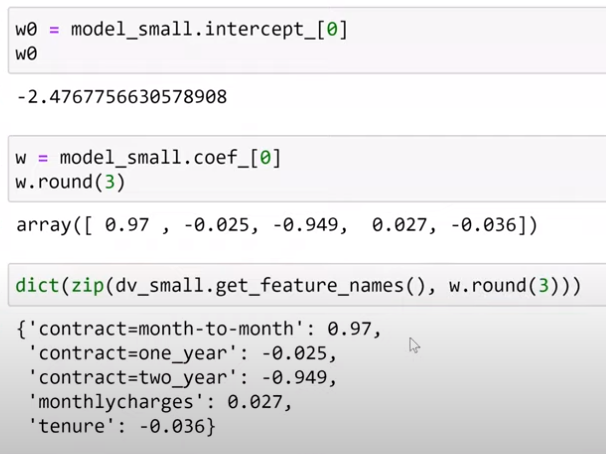

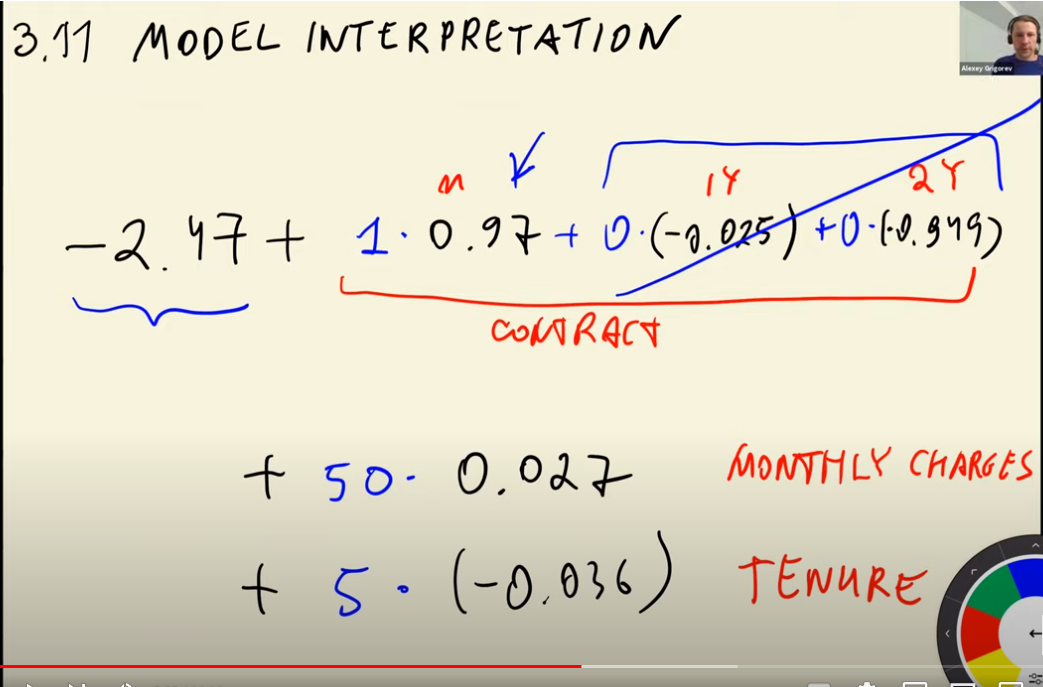

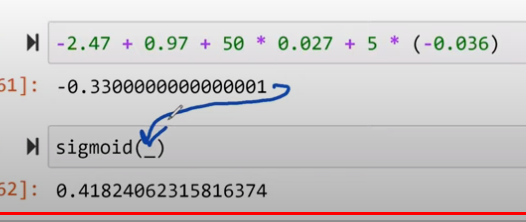

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [103]:
small = ["year", "engine_hp", "transmission_type", "city_mpg"]

def eval_metric(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuracy on the validation dataset:", round(accuracy, 3))
    return accuracy

for i in small:
    df_train_small = df_train.drop(i, axis=1)
    df_val_small = df_val.drop(i, axis=1)
    
    dicts_train_small = df_train_small.to_dict(orient="records")
    dicts_val_small = df_val_small.to_dict(orient="records")
    
    dv_small = DictVectorizer(sparse=False)
    dv_small.fit(dicts_train_small)
    
    X_train_small = dv_small.transform(dicts_train_small)
    X_val_small = dv_small.transform(dicts_val_small)
    
    model_small = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=1)
    model_small.fit(X_train_small, y_train)
    
    y_small_pred = model_small.predict(X_val_small)

    accuracy_small = eval_metric(y_val, y_small_pred)
    print(f"Accuracy differencences without '{i}':", round(accuracy-accuracy_small, 5))

Accuracy differencences without 'year': -0.00168
Accuracy differencences without 'engine_hp': 0.01595
Accuracy differencences without 'transmission_type': 0.00126
Accuracy differencences without 'city_mpg': 0.00042


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [104]:
df_lin = df.drop("above_average",axis=1)
df_lin.head()

make       model  year  engine_hp  engine_cylinders transmission_type  \
0  BMW  1 Series M  2011   335.0000            6.0000            MANUAL   
1  BMW    1 Series  2011   300.0000            6.0000            MANUAL   
2  BMW    1 Series  2011   300.0000            6.0000            MANUAL   
3  BMW    1 Series  2011   230.0000            6.0000            MANUAL   
4  BMW    1 Series  2011   230.0000            6.0000            MANUAL   

  vehicle_style  highway_mpg  city_mpg  price  
0         Coupe           26        19  46135  
1   Convertible           28        19  40650  
2         Coupe           28        20  36350  
3         Coupe           28        18  29450  
4   Convertible           28        18  34500

In [105]:
df_lin.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [106]:
df_lin.price.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: price, dtype: int64

In [107]:
df_lin.price = np.log1p(df_lin.price)
df_lin.price.head()

0   10.7393
1   10.6128
2   10.5010
3   10.2905
4   10.4487
Name: price, dtype: float64

In [108]:
np.random.seed(2)

n = len(df_lin)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_lin.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [109]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [111]:
dicts_train = df_train.to_dict(orient="records")
dicts_val = df_val.to_dict(orient="records")
    
dv_dict = DictVectorizer(sparse=False)
dv_dict.fit(dicts_train)
    
X_train = dv_dict.transform(dicts_train)
X_val = dv_dict.transform(dicts_val)

In [114]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def eval_metric(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    #print(f"rmse score: {rmse.round(3)}")
    return r2, mae, mse, rmse

for alpha in [0, 0.01, 0.1, 1, 10]:
    ridge = Ridge(solver='sag', random_state=1, alpha=alpha)    
    ridge.fit(X_train, y_train)
    y_val_pred = ridge.predict(X_val)
    r2, mae, mse, rmse = eval_metric(y_val, y_val_pred)

    print(f"{ridge} RMSE: {rmse}")

C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0, random_state=42, solver='sag') RMSE: 0.48242118969154335


C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.01, random_state=42, solver='sag') RMSE: 0.48242141298213465


C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.1, random_state=42, solver='sag') RMSE: 0.4824234225126178


C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=1, random_state=42, solver='sag') RMSE: 0.4824435124394913
Ridge(alpha=10, random_state=42, solver='sag') RMSE: 0.4826438676338455


C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
